In [1]:
import torch
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
def project_onto_direction(H, direction):
    """Project matrix H (n, d_1) onto direction vector (d_2,)"""
    # TODO: should we require direction vectors to be unit vectors? then return H.dot(direction)
    mag = np.linalg.norm(direction)
    assert not np.isinf(mag)
    return_list = []
    for vec in H:
        return_list.append(vec.dot(direction) / mag)
    return torch.tensor(return_list)

In [3]:
data = np.load("./output/emotion/iter_grads_new.npz", allow_pickle=True)['my_array']

In [4]:
# num_item, iter, layer, bs=1, token_pos
test = torch.cat([torch.tensor(data[0][i][6][:, 0]).float() for i in range(10)])
# data[0][1]
for i in range(1, len(test)):
    test[i] = test[i] + test[i-1]

In [5]:
len(data[0])

10

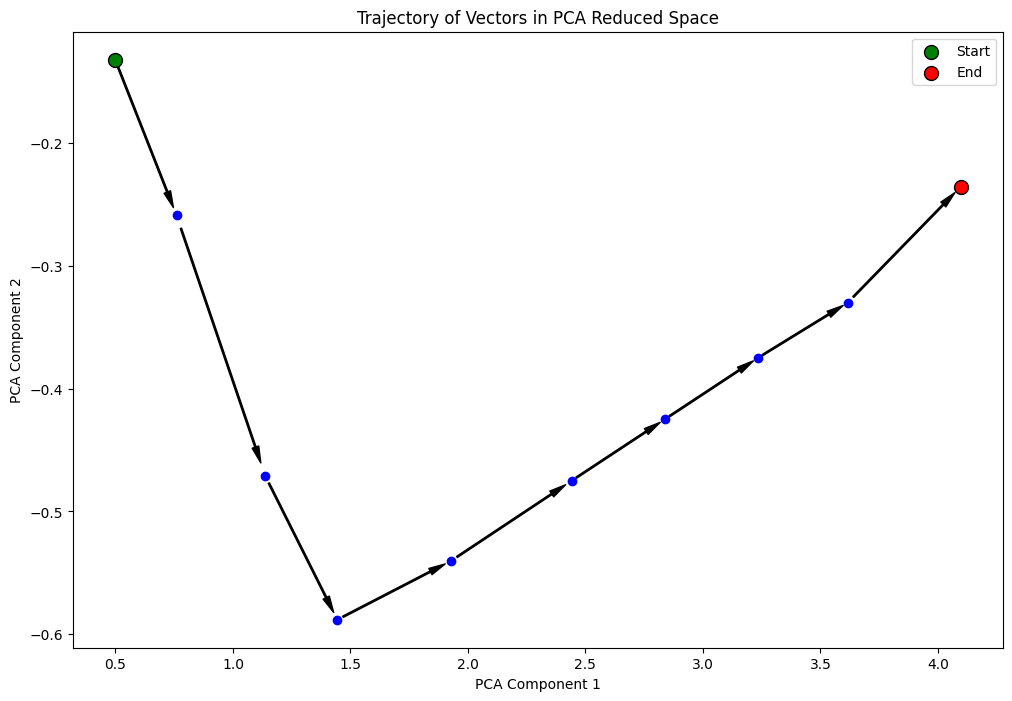

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Example data: Replace with your actual vectors
# init_grad = torch.randn(1, 100)
# data = torch.cat([init_grad+0.1*(i-1) for i in range(10)]+[init_grad])

# Apply PCA to reduce dimensions
pca = PCA(n_components=2,)
pca.fit_transform(test)

comp0 = project_onto_direction(test, torch.tensor(pca.components_[0]).float())
comp1 = project_onto_direction(test, torch.tensor(pca.components_[1]).float())
reduced_data = torch.stack([comp0, comp1], dim=0).transpose(0,1)

# Plot the trajectory
plt.figure(figsize=(12, 8))

# Loop through and plot each arrow
for i in range(len(reduced_data) - 1):
    plt.annotate('', xy=reduced_data[i + 1, :2], xytext=reduced_data[i, :2],
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))

# Scatter plot for points
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], color='blue')

# # Mark the start and end points
plt.scatter(reduced_data[0, 0], reduced_data[0, 1], color='green', label='Start', edgecolor='black', s=100)  # Start point
plt.scatter(reduced_data[-1, 0], reduced_data[-1, 1], color='red', label='End', edgecolor='black', s=100)    # End point

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Trajectory of Vectors in PCA Reduced Space')
plt.legend()
plt.show()


In [119]:
reduced_data

tensor([[ 0.5189, -0.0846],
        [ 0.8079, -0.1606],
        [ 1.2318, -0.2952],
        [ 1.5627, -0.2750],
        [ 2.0056, -0.0412]])

In [124]:
init_grad = torch.zeros(1, 100)
data = torch.cat([init_grad+0.1*(-1)**i for i in range(5)])

# Apply PCA to reduce dimensions
pca = PCA(n_components=2,)
reduced_data = pca.fit_transform(data)
comp0 = project_onto_direction(data, torch.tensor(pca.components_[0]).float())
comp1 = project_onto_direction(data, torch.tensor(pca.components_[1]).float())
torch.stack([comp0, comp1], dim=0)

tensor([[-1.0000e+00,  1.0000e+00, -1.0000e+00,  1.0000e+00, -1.0000e+00],
        [ 1.1176e-08, -1.1176e-08,  1.1176e-08, -1.1176e-08,  1.1176e-08]])

In [125]:
data.shape

torch.Size([5, 100])

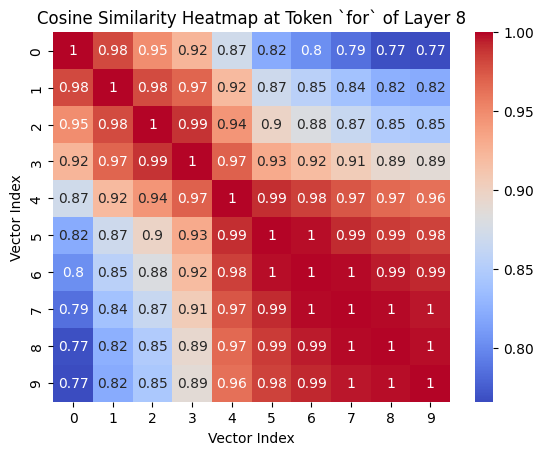

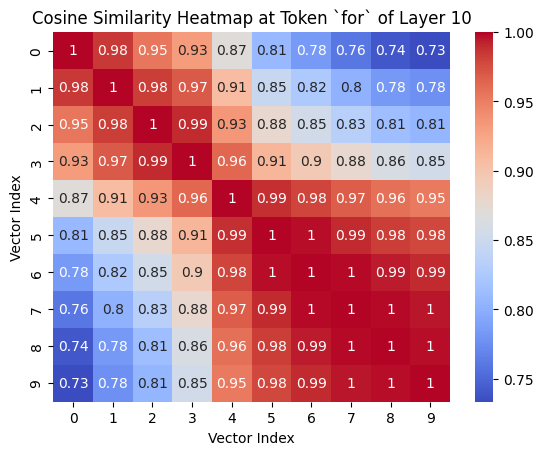

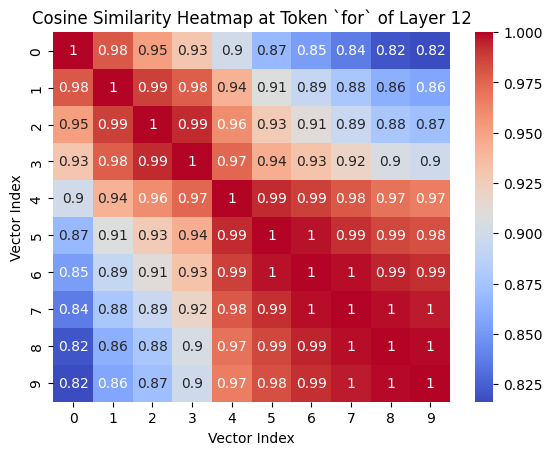

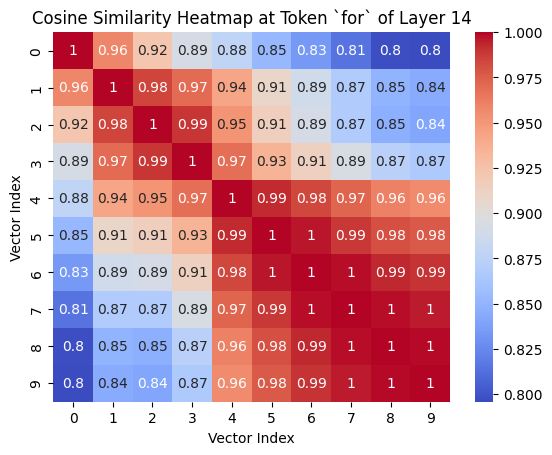

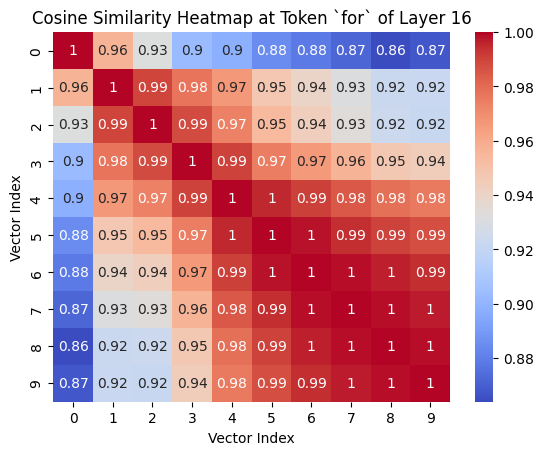

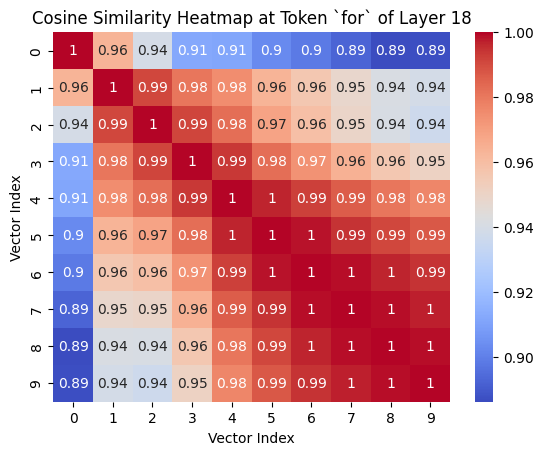

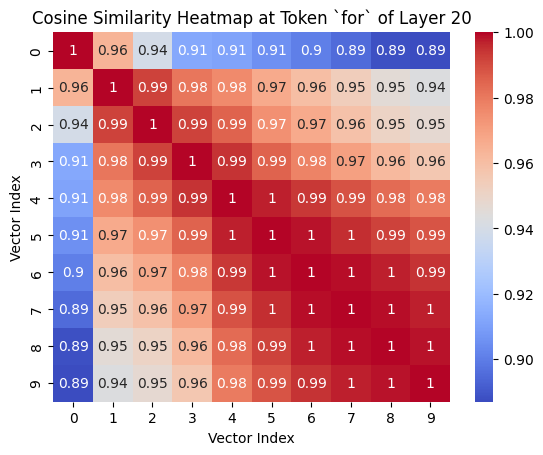

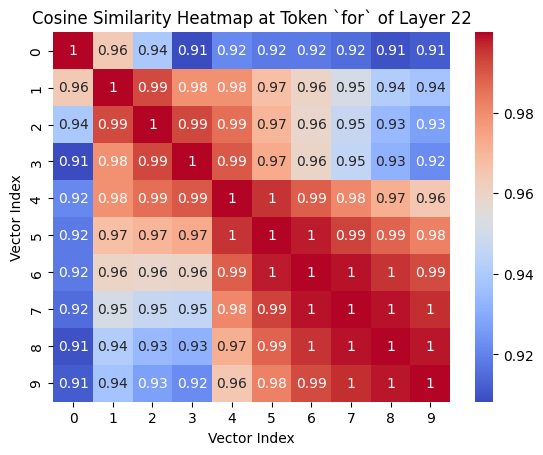

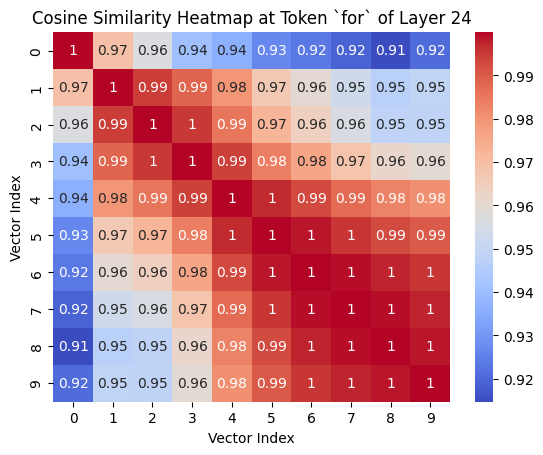

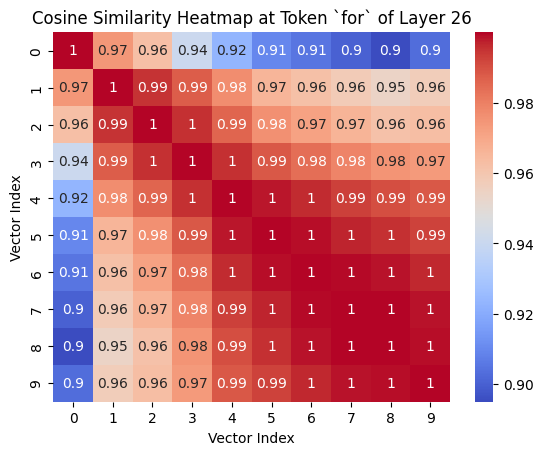

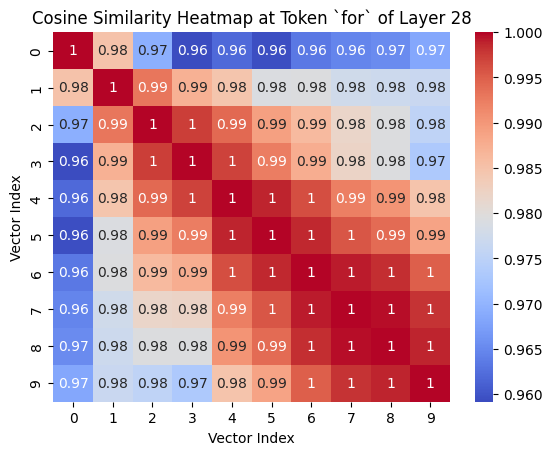

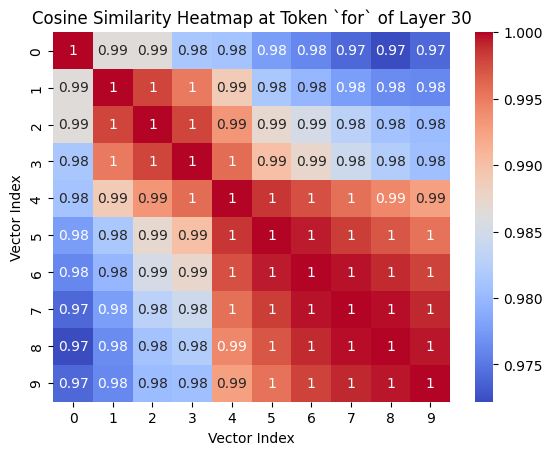

In [7]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

layer = 8

tokens = ['[', 'INST', ']', 'Your', 'favorite', 'plant', ',', 'which', 'you', "'", 've', 'c', 'ared', 'for', 'years', ',', 'begins', 'to', 'w', 'ilt', '.', '[', '/', 'INST', ']']

for k in range(8, 32, 2):
    test = torch.cat([torch.tensor(data[0][i][k][:, 13]).float() for i in range(10)])
    # data[0][1]
    for i in range(1, len(test)):
        test[i] = test[i] + test[i-1]

    # Example list of vectors (in PyTorch tensor format)
    vectors = test



    # Calculate cosine similarity
    n = vectors.size(0)
    cosine_sim_matrix = torch.zeros((n, n))

    for i in range(n):
        for j in range(n):
            cosine_sim_matrix[i, j] = F.cosine_similarity(vectors[i].unsqueeze(0), vectors[j].unsqueeze(0))

    # Draw an n×n graph (heatmap) of cosine similarities
    sns.heatmap(cosine_sim_matrix.numpy(), annot=True, cmap='coolwarm')
    plt.title(f'Cosine Similarity Heatmap at Token `{tokens[13]}` of Layer {k}')
    plt.xlabel('Vector Index')
    plt.ylabel('Vector Index')
    plt.show()




In [237]:
j

9